Calling necassary modules

In [1948]:
import warnings

from pyforest import*
lazy_imports()
%matplotlib inline
warnings.filterwarnings('ignore')

Data Collection and Processing

In [1949]:
# Importation de la data de notre fichier de format csv
df = pd.read_csv('C://Users//yassir//Desktop//BigMart Data//Big Mart Sales DataSet//train.csv')

<IPython.core.display.Javascript object>

In [1950]:
# afficher les premiers colonnes
df.head()

,element_Identifier,element_Weight,element_Fat_Content,element_Visibility,element_Type,element_MRP,store_Identifier,store_Establishment_Year,store_Size,store_Location_Type,store_Type,element_store_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1951]:
# les dimensions de la dataframe, combien d'elements ett combien d'attributs
df.shape

(8523, 12)

In [1952]:
# Description de la dataframe (remarquons le type des elements de chaque attribut)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   element_Identifier        8523 non-null   object 
 1   element_Weight            7060 non-null   float64
 2   element_Fat_Content       8523 non-null   object 
 3   element_Visibility        8523 non-null   float64
 4   element_Type              8523 non-null   object 
 5   element_MRP               8523 non-null   float64
 6   store_Identifier          8523 non-null   object 
 7   store_Establishment_Year  8523 non-null   int64  
 8   store_Size                6113 non-null   object 
 9   store_Location_Type       8523 non-null   object 
 10  store_Type                8523 non-null   object 
 11  element_store_Sales       8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Ceci nous a permi de differencier entre attributs numeriques et ceux 'object'

In [1953]:
# Savoir si il y a des valeurs null
df.isnull().sum()

element_Identifier             0
element_Weight              1463
element_Fat_Content            0
element_Visibility             0
element_Type                   0
element_MRP                    0
store_Identifier               0
store_Establishment_Year       0
store_Size                  2410
store_Location_Type            0
store_Type                     0
element_store_Sales            0
dtype: int64

Remplicage de ces cases vides

on remplis element_weight avec la moyenne de la colonne  mais pour store _size qui est object on prend la valeur la plus repetée selon le type de magazin 'store_type'

In [1954]:
# la valeur moyenne de "element_Weight" 
df['element_Weight'].mean()

12.857645184136183

In [1955]:
# Remplicage des cases vides de cette colonne par la valeur moyenne 
df['element_Weight'].fillna(df['element_Weight'].mean(), inplace=True)

In [1956]:
# les valeurs les plus repetées pour 'store_Size' selon 'store_Type' 
df['store_Size'].mode()

0    Medium
dtype: object

In [1957]:
# Remplicage des cases vides de cette colonne par les valeurs obtenues
mode_of_store_size = df.pivot_table(values='store_Size', columns='store_Type', aggfunc=(lambda x: x.mode()[0]))

In [1958]:
mode_of_store_size

store_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
store_Size,Small,Small,Medium,Medium


In [1959]:
null_values = df['store_Size'].isnull()   

In [1960]:
print(null_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: store_Size, Length: 8523, dtype: bool


In [1961]:
df.loc[null_values, 'store_Size'] = df.loc[null_values,'store_Type'].apply(lambda x: mode_of_store_size[x])

In [1962]:
# Voir si il y a encore des cases vides
df.isnull().sum()

element_Identifier          0
element_Weight              0
element_Fat_Content         0
element_Visibility          0
element_Type                0
element_MRP                 0
store_Identifier            0
store_Establishment_Year    0
store_Size                  0
store_Location_Type         0
store_Type                  0
element_store_Sales         0
dtype: int64

analyser les données

In [1963]:
df.describe()

,element_Weight,element_Visibility,element_MRP,store_Establishment_Year,element_store_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


visualisation des données

In [1964]:
sns.set()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

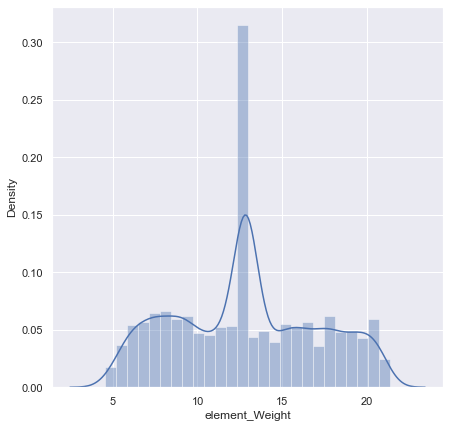

In [1965]:
# la distribution de elemnt_weight
plt.figure(figsize=(7,7))
sns.distplot(df['element_Weight'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

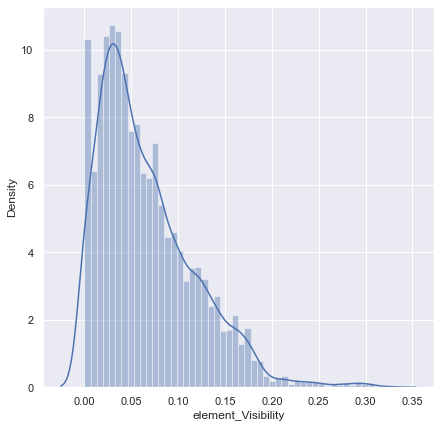

In [1966]:
# la distribution de element_visibility
plt.figure(figsize=(7,7))
sns.distplot(df['element_Visibility'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

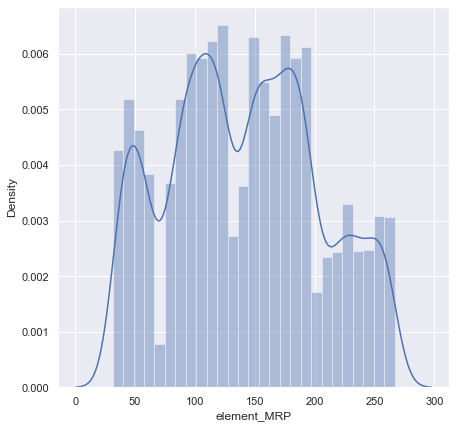

In [1967]:
# la distribution de prix des elements
plt.figure(figsize=(7,7))
sns.distplot(df['element_MRP'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

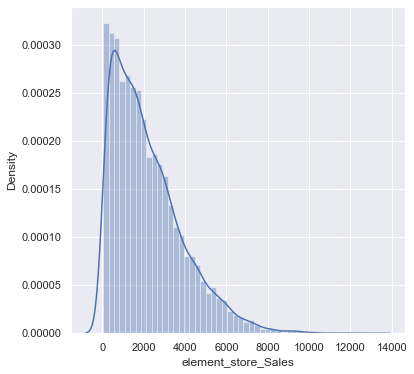

In [1968]:
# la distribution de element_store_Sales
plt.figure(figsize=(6,6))
sns.distplot(df['element_store_Sales'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

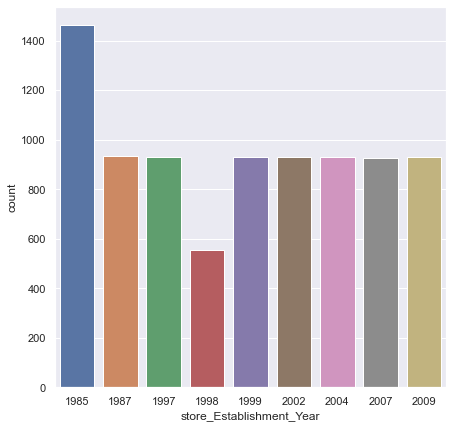

In [1969]:
# Années de creation des magasins
plt.figure(figsize=(7,7))
sns.countplot(x='store_Establishment_Year', data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

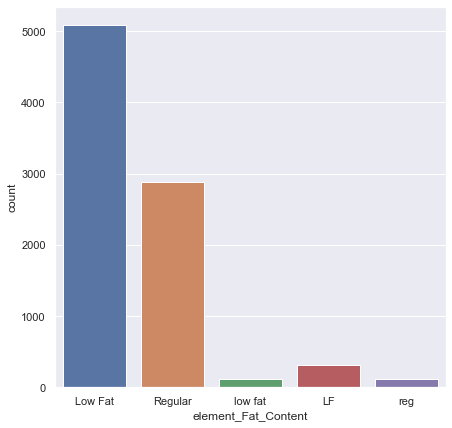

In [1970]:
# element_Fat_Content, remarquons qu'il y'a des repetitions 'LF=Low at=low at, reg= Regular'
plt.figure(figsize=(7,7))
sns.countplot(x='element_Fat_Content', data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

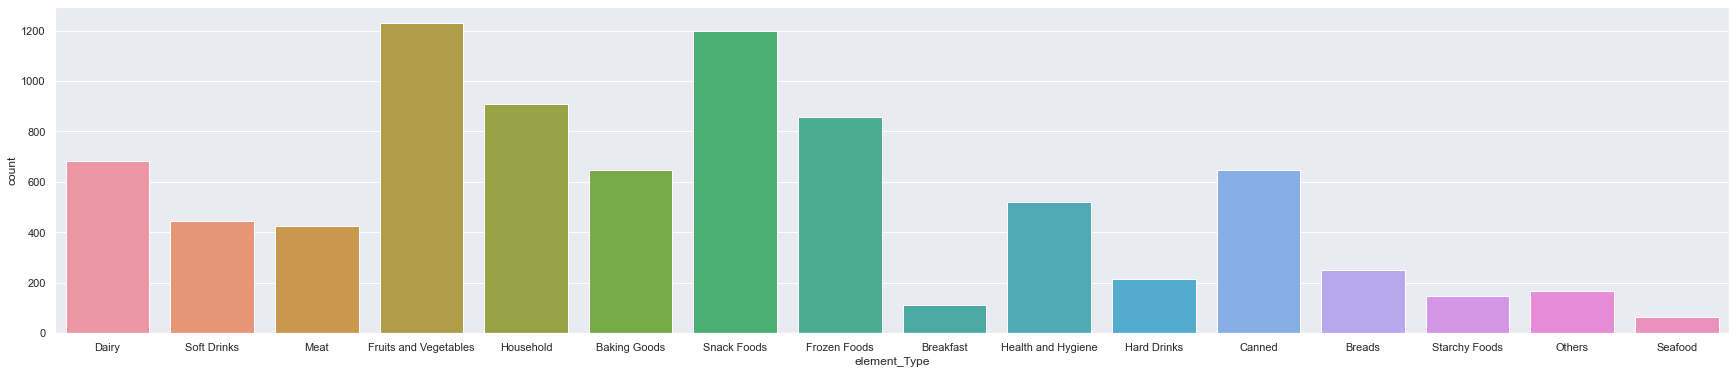

In [1971]:
# Attribut element_Type 
plt.figure(figsize=(30,6))
sns.countplot(x='element_Type', data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

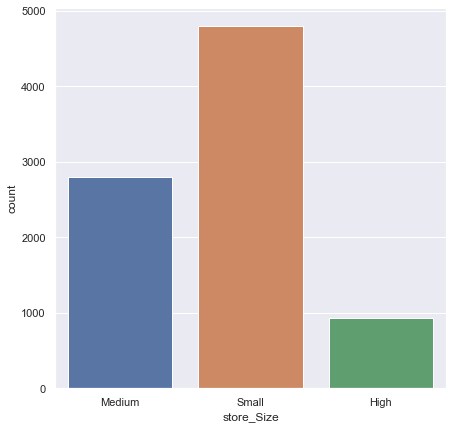

In [1972]:
# Attribut store_size
plt.figure(figsize=(7,7))
sns.countplot(x='store_Size', data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

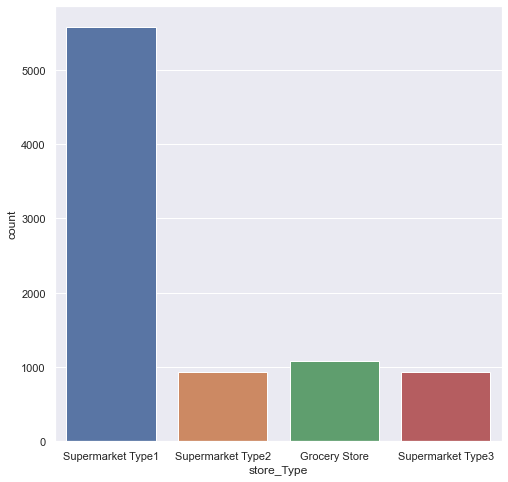

In [1973]:
# Attribut store_Type
plt.figure(figsize=(8,8))
sns.countplot(x='store_Type', data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

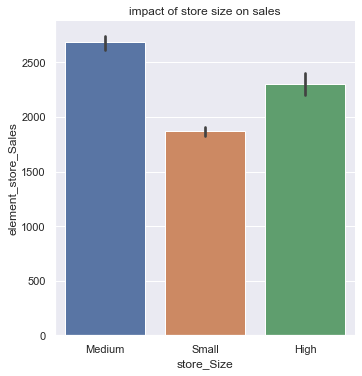

In [1974]:
sns.catplot(x="store_Size" ,y="element_store_Sales",kind="bar",data = df);
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('impact of store size on sales')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

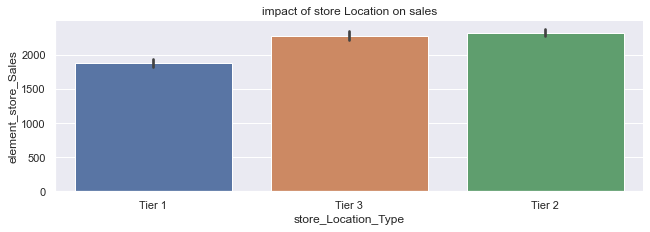

In [1975]:
sns.catplot(x="store_Location_Type" ,y="element_store_Sales",kind="bar",data = df,height=3, aspect=3);
plt.title('impact of store Location on sales')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

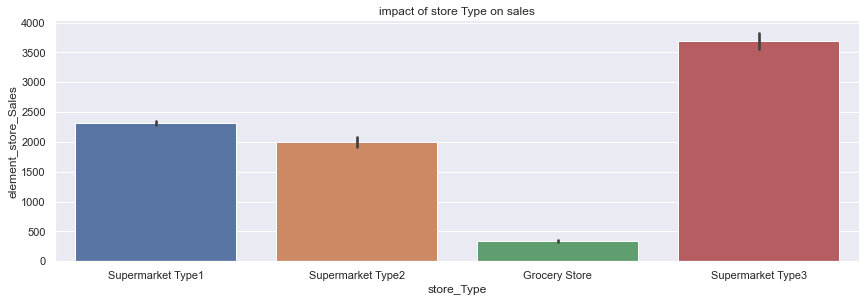

In [1976]:
sns.catplot(x="store_Type" ,y="element_store_Sales",kind="bar",data = df,height=4, aspect=3);
plt.title('impact of store Type on sales')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

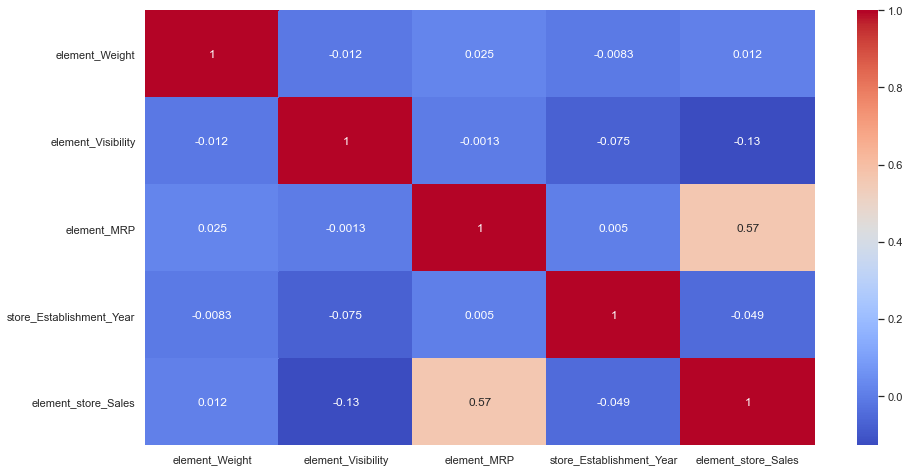

In [1977]:
corrolation = df.corr()
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corrolation, annot=True, cmap='coolwarm')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='element_Weight', ylabel='element_store_Sales'>

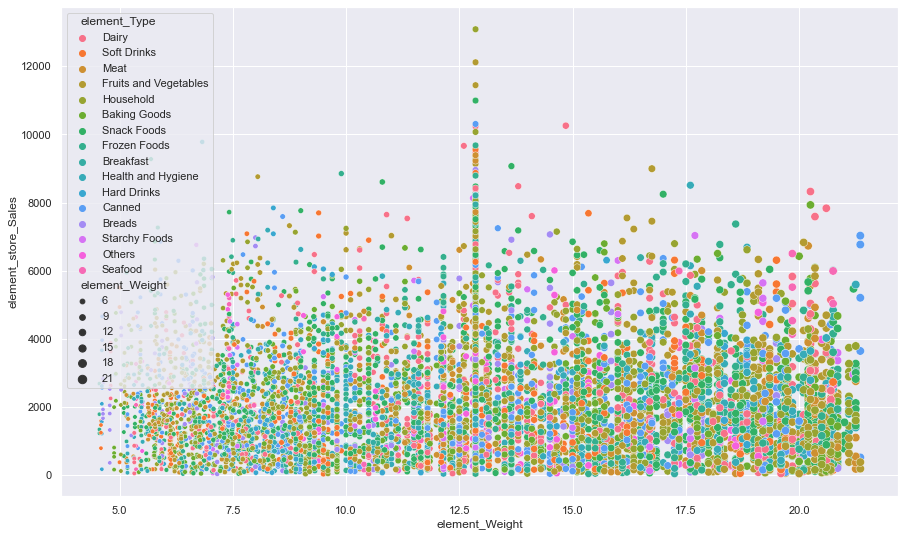

In [1978]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='element_Weight',y = 'element_store_Sales', hue = 'element_Type', size = 'element_Weight', data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

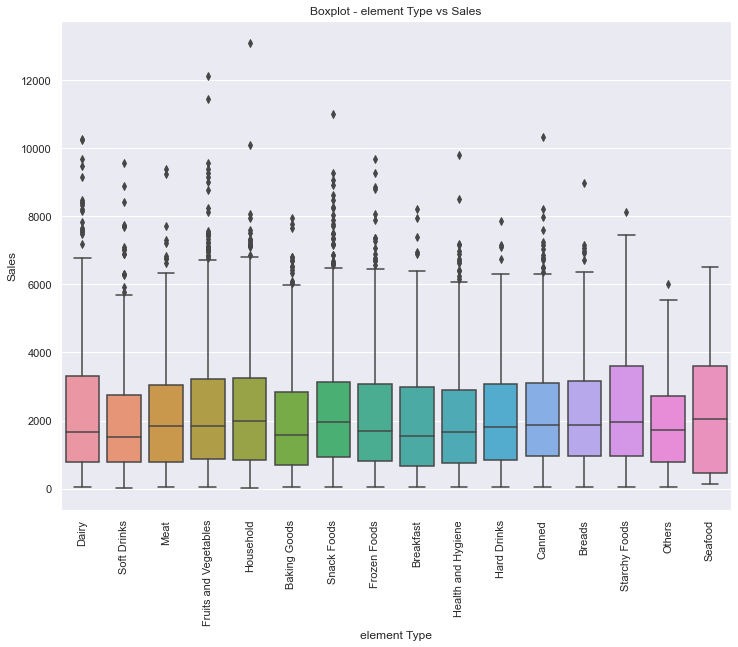

In [1979]:
plt.figure(figsize = [12,9])
sns.boxplot(df.element_Type, df.element_store_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - element Type vs Sales")
plt.xlabel("element Type")
plt.ylabel("Sales")
plt.show()

Completer le cleaning des données

In [1980]:
df.head()

,element_Identifier,element_Weight,element_Fat_Content,element_Visibility,element_Type,element_MRP,store_Identifier,store_Establishment_Year,store_Size,store_Location_Type,store_Type,element_store_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1981]:
df['element_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: element_Fat_Content, dtype: int64

In [1982]:
df.replace({'element_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [1983]:
df['element_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: element_Fat_Content, dtype: int64

Codage des 5 colonnes de type 'objects'

In [1984]:
Numy = LabelEncoder()

<IPython.core.display.Javascript object>

In [1985]:
df['element_Identifier'] = Numy.fit_transform(df['element_Identifier'])

df['element_Fat_Content'] = Numy.fit_transform(df['element_Fat_Content'])

df['element_Type'] = Numy.fit_transform(df['element_Type'])

df['store_Identifier'] = Numy.fit_transform(df['store_Identifier'])

df['store_Size'] = Numy.fit_transform(df['store_Size'])

df['store_Location_Type'] = Numy.fit_transform(df['store_Location_Type'])

df['store_Type'] = Numy.fit_transform(df['store_Type'])

In [1986]:
df.head()

,element_Identifier,element_Weight,element_Fat_Content,element_Visibility,element_Type,element_MRP,store_Identifier,store_Establishment_Year,store_Size,store_Location_Type,store_Type,element_store_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Separation de la colonne objectif 

In [1987]:
X = df.drop(columns='element_store_Sales', axis=1)
Y = df['element_store_Sales']

In [1988]:
print(X)

      element_Identifier  element_Weight  element_Fat_Content  \
0                    156           9.300                    0   
1                      8           5.920                    1   
2                    662          17.500                    0   
3                   1121          19.200                    1   
4                   1297           8.930                    0   
...                  ...             ...                  ...   
8518                 370           6.865                    0   
8519                 897           8.380                    1   
8520                1357          10.600                    0   
8521                 681           7.210                    1   
8522                  50          14.800                    0   

      element_Visibility  element_Type  element_MRP  store_Identifier  \
0               0.016047             4     249.8092                 9   
1               0.019278            14      48.2692                 3   


In [1989]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: element_store_Sales, Length: 8523, dtype: float64


Separation des données pour efectuer l'apprentissage et puis le test

In [1990]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

<IPython.core.display.Javascript object>

In [1991]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Apprentissage des Modeles

Model_1 XGBoost Regressor

In [1992]:
from xgboost import XGBRegressor
Model_1 = XGBRegressor()

In [1993]:
Model_1.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Evaluation de nos modeles

In [1994]:
df_training_prediction = Model_1.predict(X_train)

In [1995]:
# Calculer la valeur de R^2
r2_train_1 = metrics.r2_score(Y_train, df_training_prediction)

<IPython.core.display.Javascript object>

In [1996]:
print('R^2_1 = ', r2_train_1)

R^2_1 =  0.8639680373364909


In [1997]:
df_testing_prediction = Model_1.predict(X_test)

In [1998]:
# Calculer la valeur de R^2 'test'
r2_test_1 = metrics.r2_score(Y_test, df_testing_prediction)

<IPython.core.display.Javascript object>

In [1999]:
print('R^2_1 = ', r2_test_1)

R^2_1 =  0.5233136709735687


In [2000]:
Score_1= round(Model_1.score(X_test, Y_test)*100)
Score_1

52

In [2001]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
Model_2 = LinearRegression(normalize=True)
Model_2.fit(X_train, Y_train)

LinearRegression(normalize=True)

In [2002]:
df_training_prediction = Model_2.predict(X_train)

In [2003]:
# Calculer la valeur de R^2
r2_train_2 = metrics.r2_score(Y_train, df_training_prediction)

<IPython.core.display.Javascript object>

In [2004]:
print('R^2_2 = ', r2_train_2)

R^2_2 =  0.5071929167339232


In [2005]:
df_testing_prediction = Model_2.predict(X_test)

In [2006]:
# Calculer la valeur de R^2 'test'

r2_test_2 = metrics.r2_score(Y_test, df_testing_prediction)

<IPython.core.display.Javascript object>

In [2007]:
print('R^2_2 = ', r2_test_2)

R^2_2 =  0.48912987193626334


In [2008]:
Score_2= round(Model_2.score(X_test, Y_test)*100)
Score_2

49

In [2009]:
from sklearn.tree import DecisionTreeRegressor
Model_3 = DecisionTreeRegressor()
Model_3.fit(X_train, Y_train)

DecisionTreeRegressor()

In [2010]:
df_training_prediction = Model_3.predict(X_train)

In [2011]:
# Calculer la valeur de R^2
r2_train_3 = metrics.r2_score(Y_train, df_training_prediction)

<IPython.core.display.Javascript object>

In [2012]:
print('R^2_3 = ', r2_train_3)

R^2_3 =  1.0


In [2013]:
df_testing_prediction = Model_3.predict(X_test)

In [2014]:
# Calculer la valeur de R^2 'test'

r2_test_3 = metrics.r2_score(Y_test, df_testing_prediction)

<IPython.core.display.Javascript object>

In [2015]:
print('R^2 = ', r2_test_3)

R^2 =  0.17024708475950734


In [2016]:
Score_3= round(Model_3.score(X_test, Y_test)*100)
Score_3

17

In [2017]:
from sklearn.ensemble import ExtraTreesRegressor
Model_4 = RandomForestRegressor()
Model_4.fit(X_train, Y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [2018]:
df_training_prediction = Model_4.predict(X_train)

In [2019]:
# Calculer la valeur de R^2
r2_train_4 = metrics.r2_score(Y_train, df_training_prediction)

<IPython.core.display.Javascript object>

In [2020]:
print('R^2 = ', r2_train_4)

R^2 =  0.9371409387792067


In [2021]:
Score_4= round(Model_4.score(X_test, Y_test)*100)
Score_4

55

In [2022]:
df_testing_prediction = Model_4.predict(X_test)

In [2023]:
# Calculer la valeur de R^2 'test'

r2_test_4 = metrics.r2_score(Y_test, df_testing_prediction)

<IPython.core.display.Javascript object>

In [2024]:
print('R^2 = ', r2_test_4)

R^2 =  0.5530495488935538


In [2025]:
Evaluations = [[r2_train_1, r2_train_2, r2_train_3,r2_train_4], 
    [r2_test_1, r2_test_2, r2_test_3,r2_test_4]]

In [2026]:
print(Evaluations)

[[0.8639680373364909, 0.5071929167339232, 1.0, 0.9371409387792067], [0.5233136709735687, 0.48912987193626334, 0.17024708475950734, 0.5530495488935538]]


In [2027]:
print("XGBOOST score =",Score_1,'    Linear regression score =',Score_2,'        DecisionTreeRegressor score =', Score_3, '        RandomForestRegressor score =',Score_4)

XGBOOST score = 52     Linear regression score = 49         DecisionTreeRegressor score = 17         RandomForestRegressor score = 55
